<a href="https://colab.research.google.com/github/msskx/MathModeling/blob/main/%E5%B1%82%E6%AC%A1%E5%88%86%E6%9E%90%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

层次分析法做题步骤：

问题引入：码帅找对象，现在有三个女生：S，Levi，M他该怎么选？

码帅一想，这个我熟，很明显这是一道评价类问题，就用层次分析法进行抉择，首先先选择评价指标

**“外貌”，“三观”，“成绩”，“家境”，“性格”**

然后针对三个妹子的各项指标进行判断，求出权重，然后代入每个人的具体各项得分进行加权求和。

首先根据判断指标建立判断矩阵，得到判断矩阵之后，进行一致性检验，然后再求权重，若正互反矩阵满足$a_{ij}*a_{jk}=a_{ik}$，则我们称其为一致性矩阵。

一致性检验的步骤如下：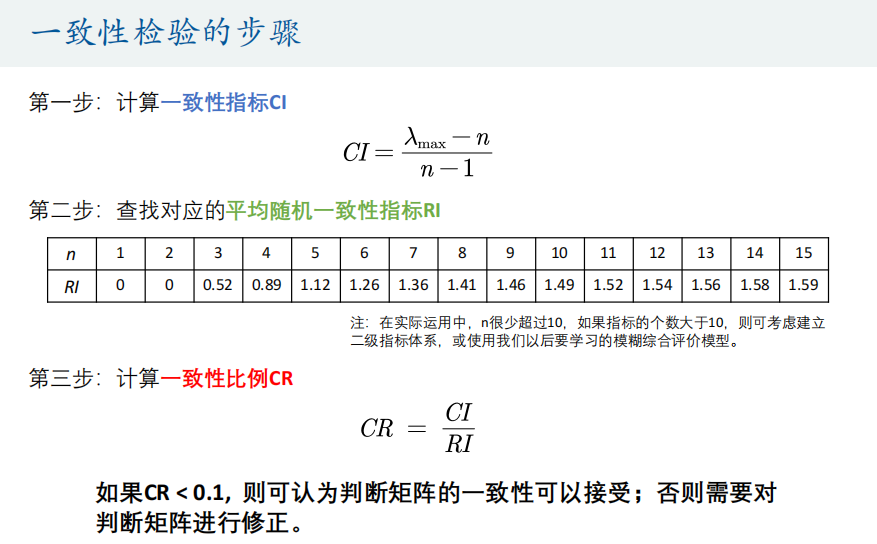

如果发现矩阵不一致的话就，进行调整，（一致性矩阵的行列均成比例）


得到一致性矩阵之后进行求权重操作

首先锁定一下三种求权重的方法：


1.   算数平均法求权重
    
    1.1步骤：①将判断矩阵按照列归一化，（每个元素除以所在列的和）
    ②将归一化的各列相加（按行求和）③将相加后得到的向量中每个元素除以n即可得到权重向量

2.   几何平均法求权重

    2.1步骤：①将矩阵A的元素按照行相乘得到一个新的列向量②将新的向量的每个分量开n次方③对该列向量进行归一化即可得到权重向量

3.   特征值法求权重

    3.1步骤：求出矩阵A的最大特征值以及其对应的特征向量，对求出的特征向量进行归一化即可得到权重


得到权重后，对各项指标进行加权求和得到三个妹子的评分

绘制层次分析法的层次结构图

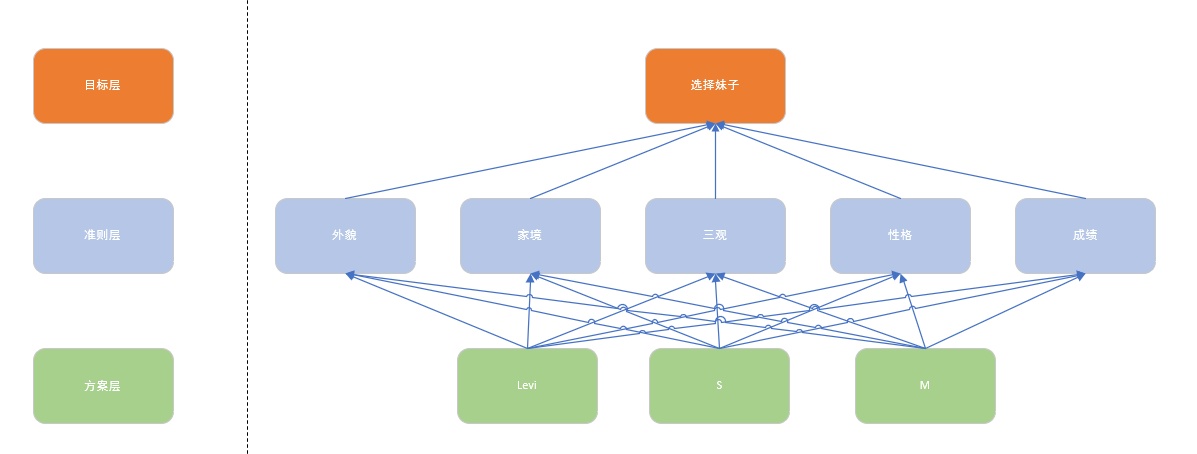


## 注意：
在论文写作中，首先应该对判断矩阵进行一致性检验，然后再计算权重因为只有判断矩阵通过了一致性检验，其权重才是有意义的
判断矩阵只能给1-9以及其倒数

一致性矩阵的各行各列呈现倍数关系，但是，实际论文给一个一致性矩阵会太假，所以做好给一个非一致性矩阵还能通过一致性检验。


经过查阅资料以及组员讨论得出以下判断矩阵
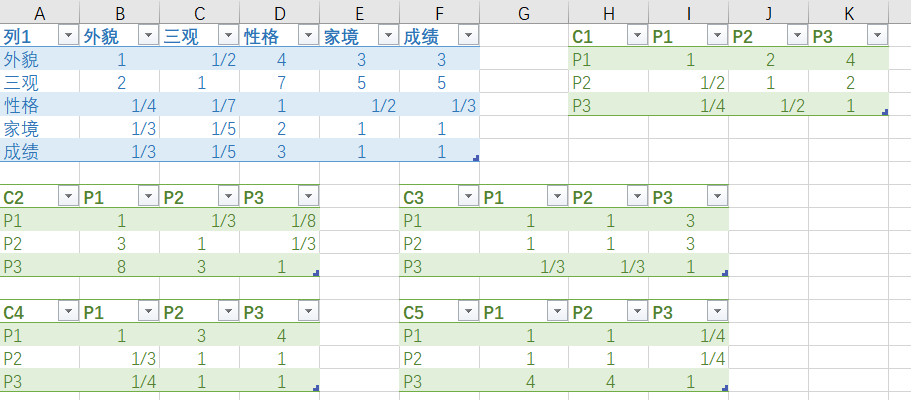

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("输入判断矩阵A")

n=int(input("请输入特征个数"))
A=np.zeros((n,n))
for i in range(n):
  for j in range(n):
    A[i][j]=float(input())

输入判断矩阵A
请输入特征个数3
2
3
4
5
6
3
4
5
6


In [29]:
print("输入原矩阵为\n",A)

输入原矩阵为
 [[2. 3. 4.]
 [5. 6. 3.]
 [4. 5. 6.]]


In [43]:
print("算数平均法求权重：")
columns_A=[]#按行求和
temp=[]#结果矩阵
for i in range(n):
  columns_A.append(sum(A[:,i]))
for j in range(n):
  temp.append(columns_A)

temp=A/temp#得到归一化矩阵

stard_A=[]

for i in range(n):
  stard_A.append(sum(temp[i,:])/n)#将归一化矩阵按行相加并/n
print("权重向量：",stard_A)#得到权重向量


算数平均法求权重：
权重向量： [0.2345987345987346, 0.37129537129537127, 0.3941058941058941]


In [44]:
A[0][0]

2.0

In [49]:
print("几何平均法求权重：")
columns_A=[]#存储按行相乘结果
for i in range(n):
  temp=1;
  for j in range(n):
    temp=temp*A[i][j]
  columns_A.append(temp)
for i in range(n):
  columns_A[i]=pow(columns_A[i],1/n)#每个向量开n次方
temp=[]#存储结果,开方之后归一化
for i in range(n):
  temp.append(columns_A[i]/sum(columns_A))
print("几何平均法求得权重向量",temp)


几何平均法求权重：
几何平均法求得权重向量 [0.23454400730005087, 0.36439138177969854, 0.4010646109202506]


In [126]:
print("特征值法求")

eigenvalue, featurevector = np.linalg.eig(A)

print("最大特征值为：",max(eigenvalue))

index=np.where(eigenvalue==max(eigenvalue))

print("所在索引位置是：",index)
print("对应特征向量为",featurevector[index[0]])
temp=featurevector[index[0]]


特征值法求
最大特征值为： 12.863281908261243
所在索引位置是： (array([0]),)
对应特征向量为 [[-0.41700497 -0.79229816  0.36306827]]


In [125]:
sum

-0.8462348579126313

In [127]:
stard_A=[]
sum=0
for i in temp[0]:
  sum=sum+i
for i in range(n):
  stard_A.append(ss/sum)
print("得到权重向量为：",stard_A)

得到权重向量为： [-0.4290396013471329, -0.4290396013471329, -0.4290396013471329]


In [61]:
s=np.array([23,5664,3])
n=np.where(s==max(s))
print(n)

(array([1]),)
